In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Accuracy Score for Testing Dataset: 0.9649122807017544
            Predicted_cancer  Predicted_healthy
Has_cancer                42                  2
Is_healthy                 2                 68 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.95      0.95      0.95        44

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



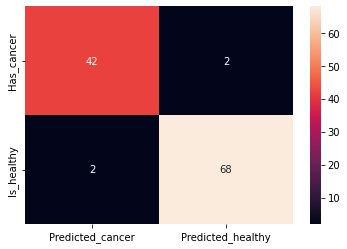

In [ ]:
data = pd.read_csv('data.csv')
data = data.sample(frac=1)
dataset = np.array(data)
X = dataset[:,2:32]
Y = dataset[:,1]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
#Fittng Decision tree classification to training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")
classifier.fit(X_train, Y_train)
#Predicting the test set results
y_predict = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_predict)
print("Accuracy Score for Testing Dataset:", accuracy)
from sklearn.metrics import confusion_matrix, classification_report
cm = np.array(confusion_matrix(Y_test,y_predict, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['Has_cancer','Is_healthy'], 
columns=['Predicted_cancer','Predicted_healthy'])
print(confusion , "\n")
print(classification_report(Y_test, y_predict))
import seaborn as sns
sns.heatmap(confusion,cbar = True, annot = True)